**LEO PAGGEN i6236337**

# NLP 2024
# Lab 1: Classification models: Detecting hate speech

The rise of social media has allowed the expression of opinions
about debatable topics. X (ex Twitter) has emerged as a strong channel of communication to gather and disseminate news, to forecast outcome of elections and to exchange political events and discussions. It has also become an  important analytical tool for crime forecasting, tracking terrorist activities and detecting hate speech.

Hate speech is commonly defined as "any message that mocks
or discriminates against a person or group based on specific
characteristics such as color, ethnicity, gender, sexual orientation, nationality, religion, or other characteristics". The
amount of hate speech is steadily increasing due to X's
popularity and the resulting big data from user-generated content.

While NLP presents a promising approach to measure, detect and fight hate speech, that sounds more easy than it is. First of all, think about all the challenges that come with language evolution and language use in practice (e.g. sarcasm, slang, cultural variations) in understanding the true intent behind text. Moreover, there is an active discussion on what exactly consitutes hate speech from a legal perspective. Read more on this [here](https://aclanthology.org/2022.nllp-1.5.pdf).

In this lab, we will explore the linguistic, technical and ethical spects of treating hate speech identification as a NLP classification task.

By the end of this lab you should be able to:
- Implement and/or use built-in functions to preprocess your data
- Implement simple classification pipelines
- Import and use `huggingface datasets` library
- Import and use functions from `sklearn`
- Evaluate classification results
- Assess the difficulty of specific NLP tasks and propose solutions
- Reflect on the ethical dimensions that a NLP model can have

### Score breakdown

Exercise | Points
--- | ---
[Exercise 1](#e1) | 7
[Exercise 2](#e2) | 2
[Exercise 3](#e3) | 2
[Exercise 4](#e4) | 2
[Exercise 5](#e5) | 5
[Exercise 6](#e6) | 4
[Exercise 7](#e7) | 5
[Exercise 8](#e8) | 5
[Exercise 9](#e9) | 5
[Exercise 10](#e10) | 10
[Exercise 11](#e11) | 3
[Exercise 12](#e12) | 10
[Exercise 13](#e13) | 5
[Exercise 14](#e14) | 10
[Exercise 15](#e15) | 10
[Exercise 16](#e16) | 10
[Exercise 17](#e17) | 5
Total | 100

This score will be scaled down to 1 and that will be your final lab score.

### Instructions for delivery (Deadline: 6/May late night, wildcards possible)

+ Make sure that you include a proper amount/mix of comments, results and code.
+ In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.
+ You are asked to deliver only your executed notebook file, .ipnyb and nothing else. Enjoy!
+ Honor code applies to these tasks. Only individual work should be submitted.
+ While you may talk with others about this lab, we ask that you write your solutions individually. If you do discuss specific tasks with others please include their names below.
+ It is mandatory to list and disclose any website (or other resource) you used (e.g. stackoverflow) as well as any genAI tools (e.g. chatGPT) used.

Collaborators: list collaborators here

**I talked with Jerry about...**

Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow): list websites where you found code (or other info) as well as include information on how you used genAI tools (e.g. prompts):

I asked chatGPT about...

## Outline
- [0 Setup](#0)
- [1: Load Dataset](#1)
- [2: Preprocess Dataset](#2)
  - [Exercise 1](#e1)
- [3: Build Vocabulary](#3)
  - [Exercise 2](#e2)
  - [Exercise 3](#e3)
  - [Exercise 4](#e4)
  - [Exercise 5](#e5)
  - [Exercise 6](#e6)
- [4: Build Handcrafted Classifier](43)
  - [Exercise 7](#e7)
  - [Exercise 8](#e8)
- [5: Build Bag-of-Words](#5)
  - [Exercise 9](#e9)
- [6: Bag-of-Words with Naive Bayes](#6)
  - [Exercise 10](#e10)
- [7: Bag-of-Words with Logistic Regression](#7)
  - [Exercise 11](#e11)
  - [Exercise 12](#e12)
- [8: TF-IDF](#8)
  - [Exercise 13](#e13)
  - [Exercise 14](#e14)
- [9: Adding Handcrafted Features](#9)
  - [Exercise 15](#e15)
  - [Exercise 16](#e16)
- [10: Reflection, Bias, Fairness, Ethics](#10)
  - [Exercise 17](#e17)


<a name='0'></a>
## 0. Setup

We will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). You can find the detailed documentation and tutorials here: [https://huggingface.co/docs/datasets/en/index](https://huggingface.co/docs/datasets/en/index)

If you don't have it installed you can run the code below:

In [1]:
! pip install -U datasets~=2.18.0

We will also need those packages, so let's import them now!

In [2]:
from collections import Counter
import re    # for regular expressions
from string import punctuation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datasets

/Users/lpaggen/miniforge3/envs/tensorflow/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<a name='1'></a>
## 1. Load Dataset

We will be using "tweet_eval" dataset and specifically the hate speech subset. You can find more info on how this dataset has been created in the following papers [[1](https://aclanthology.org/S19-2007.pdf)],[[2](https://aclanthology.org/2020.findings-emnlp.148.pdf)]. The dataset contains tweets from 2018 and the goal is to identify whether a tweet is hateful or not against any of the two target communities: immigrants and women. Make sure to read and reflect on how annotation was performed, since this can give you some insights on the modeling.

In order to load a dataset simply call ```load_dataset``` function specifying the dataset name. You can find many more datasets at the huggingface website.

In [3]:
tweet_ds = datasets.load_dataset('tweet_eval', 'hate')
print(tweet_ds)

# this will make the dataset return the values as numpy arrays
tweet_ds = tweet_ds.with_format("np")

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 9000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2970
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1000
    })
})


The loaded dataset contains three subsets ("train", "validation", and "test"). Each consists of two columns: "text" and "label". Label of 0 means "non-hate" and label of 1 means "hate" We can access them like so:

In [4]:
for i in range(8):
    print(tweet_ds['train'][i])

{'text': '@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you…', 'label': 0}
{'text': 'A woman who you fucked multiple times saying yo dick small is a compliment you know u hit that spot 😎', 'label': 1}
{'text': '@user @user real talk do you have eyes or were they gouged out by a rapefugee?', 'label': 1}
{'text': 'your girlfriend lookin at me like a groupie in this bitch!', 'label': 1}
{'text': 'Hysterical woman like @user', 'label': 0}
{'text': 'Me flirting- So tell me about your father...', 'label': 0}
{'text': 'The Philippine Catholic bishops\' work for migrant workers should focus on families who are "paying the great...', 'label': 0}
{'text': "I AM NOT GOING AFTER YOUR EX BF YOU LIEING SACK OF SHIT ! I'm done with you dude that's why I dumped your ass cause your a lieing 😂😡 bitch", 'label': 1}


<font color='red'>

as part of the dataset inspection, it might be helpful to help them extract it and actually see all data points

</font>

You can easily cast the dataset to the pandas DataFrame. We will do that below to plot the balance of the labels.

<Axes: xlabel='label'>

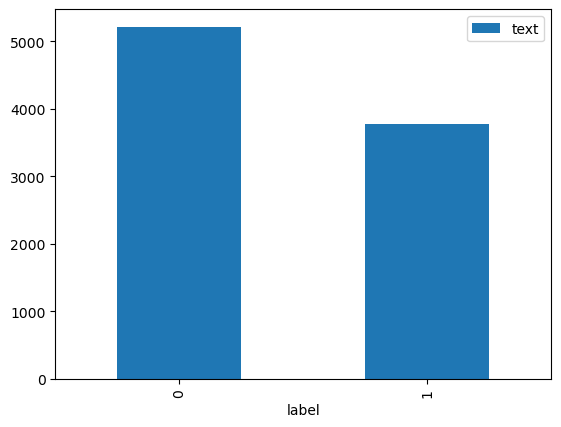

In [5]:
pd.DataFrame(tweet_ds['train']).groupby('label').count().plot.bar()

We can filter the examples based on the label. We will use ```filter()``` method. See this link for more details [https://huggingface.co/docs/datasets/en/use_dataset](https://huggingface.co/docs/datasets/en/use_dataset).

In [6]:
no_hate = tweet_ds['train'].filter(lambda e: e['label'] == 0)
for i in range(50):
    print(no_hate[i])

{'text': '@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you…', 'label': 0}
{'text': 'Hysterical woman like @user', 'label': 0}
{'text': 'Me flirting- So tell me about your father...', 'label': 0}
{'text': 'The Philippine Catholic bishops\' work for migrant workers should focus on families who are "paying the great...', 'label': 0}
{'text': 'When cuffin season is finally over', 'label': 0}
{'text': "Only that in you which is me can hear what I'm saying. ~Baba Ram Dass", 'label': 0}
{'text': 'More migrants take sea route to #Spain than Italy this year: UN', 'label': 0}
{'text': 'Essential reading for those in Scribner, Nebraska who are considering an anti-immigrant ballot measure.', 'label': 0}
{'text': 'RT @user @user I am flattered tbh. I got an orgasm just by thinking of it you really are good at this.', 'label': 0}
{'text': 'Making them look ~anatomically correct~ just makes them... Bland. Not all women are tiny and fit, not al

Let's use the ```filter()``` method to remove empty entries.

In [7]:
tweet_ds = tweet_ds.filter(lambda e: e['text'] != '' and e['text'] is not None)
print(tweet_ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8993
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2970
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 999
    })
})


<a name='2'></a>
## 2. Preprocess Dataset

In this section we will preprocess the dataset by cleaning and tokenizing the entries. You will use the knowledge and skills from the previous lab.

Datasets library contains a very useful method ```map```. It expects a function that will receive an example from the dataset. This function will be applied to all entries.

<a name='e1'></a>
### Exercise 1 (points 7)

Fill in the function in order to clean the examples. We already provide some pre-processing (e.g. turn text to a lower case) and some regular expressions to handle some punctuation special cases, however the goal is for you to implement your own operations. You might want to inspect the dataset (e.g. check several data points) before you implement this method and also you might need to revisit it after you have seen the first classification results. For every operation, try to also include the intuition behind it (unless it's obvious).

There is no exclusive list of pre-processing you need to have (since many decisions will depend on your observations). Try to include different examples of handling different language issues with specific regular expressions or other pre-processing decisions.

In [8]:
def clean(example):
    """
    Cleans the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: update example containing 'clean' column

    """
    text = example['text']

    # Empty text
    if type(text) not in (str, np.str_) or text=='':
        example['clean'] = ''
        return example

    # 'text' from the example can be of type numpy.str_, let's convert it to a python str
    text = str(text)
    text = text.lower()

    # Clean the text
    text = re.sub("\'s", " ", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE)
    text = re.sub("\'ve", " have ", text)

    #you might need more
    #add them here
    text = re.sub("…", " . ", text)
    text = re.sub(r'\.\.\.(?=\s|$)', ' .', text)
    text = re.sub(" \" ", " ", text)
    text = re.sub(" cuffin ", " cuffing ", text)
    text = re.sub(r'(?<=\w)-|-(?=\w)', '  ', text)
    text = re.sub(r'#\w+', 'HASHTAG', text)
    text = re.sub(r'@\w+', 'PERSON', text)
    text = re.sub(r'(?<=\w)\\', '', text)
    text = re.sub(r'(?=\w)\"|\"(?=\w)', '', text)
    text = re.sub(r'(?=\w)\'', '', text)
    text = re.sub(r'(?<=\w)-(?=\w)', '  ', text)
    text = re.sub(r'\~(?=\w)', '', text)
    text = re.sub(r'\.', ' .', text)
    text = re.sub(r',', ' , ', text)
    text = re.sub(" don't ", " do not ", text)
    text = re.sub(" dont ", " do not ", text)
    text = re.sub(r'\?+', ' ?', text)
    text = re.sub(r'!+', '!', text)
    text = re.sub("i'll", " i will ", text)
    text = re.sub(" r ", " are ", text)
    text = re.sub(" you're ", " you are ", text)
    text = re.sub(r'(?=\w)\:', ' : ', text)
    text = re.sub(r'\~\w+', '', text)
    text = re.sub(r'(?=\w)\?|\?(?=\w)', ' ? ', text)
    text = re.sub(r'(?=\w)!|!(?=\w)', ' ! ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(" bt ", " but ", text)
    text = re.sub(r'(?<=\w)\.', '. ', text)
    text = re.sub(r'\((?<=\w)|(?<=\w)\)', '', text)
    text = re.sub(" yo ", " you ", text)
    text = re.sub(" u ", " you ", text)
    text = re.sub(" didn't ", " did not ", text)
    text = re.sub(" can't ", " can not ", text)
    text = re.sub(" & ", " and ", text)

    ### YOUR CODE HERE
    
    # this is chatGPT - "python regex to remove emojis"
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', '', text)
    
    # my code already above




    ### YOUR CODE ENDS HERE

    # chatGPT - "remove comma between numbers, i.e. 15,000 -> 15000"
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)

    # Update the example with the cleaned text
    example['clean'] = text.strip()
    return example

This is an example of applying the ```clean()``` function you just wrote to a single entry of the dataset. The function added a 'clean' field to the example.

In [9]:
print(tweet_ds['train'][0])
print(clean(tweet_ds['train'][0]))

{'text': '@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you…', 'label': 0}
{'text': '@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you…', 'label': 0, 'clean': 'PERSON nice new signage . are you not concerned by beatlemania style hysterical crowds crongregating on you .'}


Let's finally use the ```map()``` method and apply your `clean()` function to all entries of the dataset. You can see that the ```clean``` column has been added to each split.

In [10]:
tweet_ds = tweet_ds.map(clean)
print(tweet_ds)

Map: 100%|██████████| 999/999 [00:00<00:00, 7533.38 examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'clean'],
        num_rows: 8993
    })
    test: Dataset({
        features: ['text', 'label', 'clean'],
        num_rows: 2970
    })
    validation: Dataset({
        features: ['text', 'label', 'clean'],
        num_rows: 999
    })
})


<a name='3'></a>
## 3. Build Vocabulary

Feature engineering is when NLP task-specific knowledge comes in handy, and make it more likely for a simple classifier to learn the task. This requires us to index tokens and create meaningful representations out of them.

Firstm we have to create a vocabulary. In the previous section, we implemeneted the tokenization and the cleaning.

In this section we will start by building the vocabulary for your dataset (aka the number of different words in the corpus). We will build it based on the cleaned text of the `train` split. We will investigate some properties of corpora (e.g. Zipf's law, most common words for hate speech language).



<a name='e2'></a>
### Exercise 2 (points 2)

Fill in the following function so that the ```Counter``` is returned containing all words of a sentence with the number of occurrences. Check the documentation if needed [https://docs.python.org/3/library/collections.html#collections.Counter](https://docs.python.org/3/library/collections.html#collections.Counter)

In [11]:
def get_bag_of_words(sentence):
    """
    Tokenizes the sentence into separate words.
    Args:
        sentence: string containing a sentence

    Returns: Counter of the tokens of the input sentence

    """
    ### YOUR CODE HERE
    words = sentence.split()

    words_count = Counter(words)

    # return your Counter instance
    return words_count

    ### YOUR CODE ENDS HERE


Let's test the function you just wrote:

In [12]:
sentence = tweet_ds['train'][0]['clean']
print(sentence)

sentence_bow = get_bag_of_words(sentence)
print(sentence_bow)

PERSON nice new signage . are you not concerned by beatlemania style hysterical crowds crongregating on you .
Counter({'.': 2, 'you': 2, 'PERSON': 1, 'nice': 1, 'new': 1, 'signage': 1, 'are': 1, 'not': 1, 'concerned': 1, 'by': 1, 'beatlemania': 1, 'style': 1, 'hysterical': 1, 'crowds': 1, 'crongregating': 1, 'on': 1})


We will also be interested in the word count of the whole dataset (or it's subset). The next function will combine word counts specified as a list into a single Counter.

<a name='e3'></a>
### Exercise 3 (points 2)

Fill in the following function to return a counter combining the provided list of counters. If the word is present in multiple counters the result should sum all the occurrences.

In [13]:
def aggregate_bags_of_words(bags_of_words):
    """
    Aggregates the provided list containing bags-of-words
    Args:
        bags_of_words: list of Counters

    Returns: Counter of the tokens of all bags-of-words

    """
    ### YOUR CODE HERE
    sum_counter = Counter()

    for counter in bags_of_words:
        sum_counter = sum_counter + counter # you can just sum counters it seems


    # return your Counter here
    return sum_counter

    ### YOUR CODE ENDS HERE

The next function will calculate word counts of each cleaned sentence of the dataset split and then combine them into a single Counter.

<a name='e4'></a>
### Exercise 4 (points 2)

Fill in the following function to obtain the counter representing the whole dataset. Use the function ```aggregate_bags_of_words()``` you implemented in the previous exercise.

In [14]:
def get_dataset_word_count(dataset_split):
    """
    Creates a word count (a Counter) for the dataset split.
    Args:
        dataset_split: a dataset split

    Returns: Counter of the tokens of the whole split
    """
    ### YOUR CODE HERE
    sum_count = Counter()

    for i in dataset_split['clean']:
        counter = Counter(i.split())
        sum_count = sum_count + counter

    # return your Counter here
    return sum_count

    ### YOUR CODE ENDS HERE

Here are the word counts of the `train` and `validation` subsets.

In [15]:
train_word_count = get_dataset_word_count(tweet_ds['train'])
validation_word_count = get_dataset_word_count(tweet_ds['validation'])

Let us explore them a bit more

In [16]:
print(f'train word count: {len(train_word_count)}')
print('Most common words:')
print(train_word_count.most_common(8))

print('Least common words:')
print(train_word_count.most_common()[-8:])

print(f'validation word count: {len(validation_word_count)}')
print(validation_word_count.most_common(10))

print('Most common words:')
print(validation_word_count.most_common(8))

print('Least common words:')
print(validation_word_count.most_common()[-8:])

train word count: 18867
Most common words:
[('.', 7690), ('HASHTAG', 6127), ('PERSON', 6022), ('the', 5464), ('to', 4778), (',', 4489), ('you', 4068), ('a', 3912)]
Least common words:
[('gangbang', 1), ('(stolen', 1), ('leaf', 1), ('.shame', 1), ('happiest', 1), ('birthdays', 1), ('oooohhhh', 1), ('kennedys', 1)]
validation word count: 5125
[('.', 1100), ('PERSON', 899), ('the', 749), ('you', 630), ('HASHTAG', 628), ('to', 613), (',', 612), ('a', 497), ('and', 470), ('of', 350)]
Most common words:
[('.', 1100), ('PERSON', 899), ('the', 749), ('you', 630), ('HASHTAG', 628), ('to', 613), (',', 612), ('a', 497)]
Least common words:
[('learned', 1), ('independence', 1), ('infeuenc', 1), ('scale', 1), ('hawkers', 1), ('menace', 1), ('constructions', 1), ('appeasement', 1)]


We can also plot the counts of the words. You can check the [Power law](https://en.wikipedia.org/wiki/Power_law) if you are more interested.

yes this is zipf law

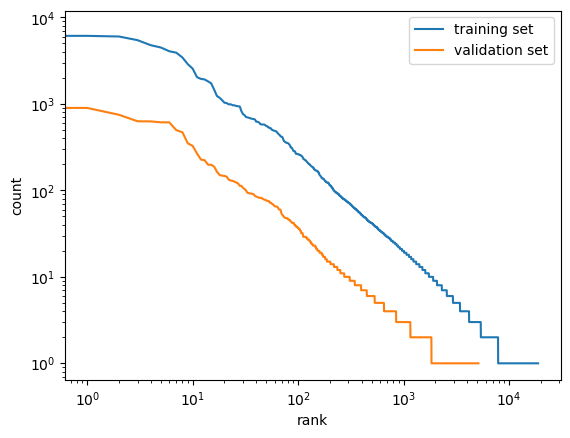

In [17]:
plt.loglog([val for word,val in train_word_count.most_common()])
plt.loglog([val for word,val in validation_word_count.most_common()])
plt.xlabel('rank')
plt.ylabel('count')
plt.legend(['training set','validation set'])

Now let's look at the sentences that are marked as hate and non-hate. We can use the method ```filter``` to get two datasets containing only the sentences labeled the same.

In [18]:
non_hate_ds = tweet_ds['train'].filter(lambda ex: ex['label'] == 0)
hate_ds = tweet_ds['train'].filter(lambda ex: ex['label'] == 1)

non_hate_word_count = get_dataset_word_count(non_hate_ds)
hate_word_count = get_dataset_word_count(hate_ds)

Filter: 100%|██████████| 8993/8993 [00:00<00:00, 368159.13 examples/s]


In [19]:
hate_words__ = hate_word_count - non_hate_word_count
non_hate_words__ = non_hate_word_count - hate_word_count

if you run the below cells, you see which words are in what

In [20]:
hate_words__

Counter({'fucked': 9,
         'multiple': 1,
         'dick': 21,
         'compliment': 3,
         'hit': 2,
         'talk': 11,
         'do': 91,
         'they': 86,
         'gouged': 1,
         'rapefugee': 15,
         'girlfriend': 11,
         'lookin': 1,
         'groupie': 2,
         'bitch!': 11,
         'lieing': 3,
         'sack': 3,
         'shit': 26,
         '!': 164,
         'done': 5,
         'why': 40,
         'dumped': 2,
         'ass': 122,
         'bitch': 600,
         'send': 19,
         'need': 12,
         'peter': 2,
         'dutton': 3,
         'country': 70,
         'should': 19,
         'overstayers': 1,
         'go': 9,
         'them': 43,
         'cory': 2,
         'booker': 12,
         'kamala': 6,
         'harris': 8,
         'competing': 4,
         'kavanaugh': 6,
         'hearings': 4,
         'coulter': 1,
         'hilariously': 1,
         'yes': 1,
         'liberals': 3,
         'immediately': 1,
         'got': 9

In [21]:
non_hate_words__

Counter({'PERSON': 234,
         'new': 108,
         'signage': 1,
         '.': 1340,
         'are': 220,
         'you': 392,
         'not': 75,
         'concerned': 5,
         'by': 99,
         'beatlemania': 1,
         'style': 3,
         'hysterical': 45,
         'crowds': 1,
         'crongregating': 1,
         'on': 262,
         'woman': 49,
         'like': 24,
         'me': 91,
         'flirting': 5,
         'so': 30,
         'tell': 3,
         'about': 162,
         'your': 52,
         'father': 13,
         'the': 932,
         'philippine': 6,
         'catholic': 19,
         "bishops'": 3,
         'work': 34,
         'for': 368,
         'migrant': 90,
         'workers': 39,
         'focus': 11,
         'families': 56,
         'who': 103,
         'great': 5,
         'when': 276,
         'cuffing': 2,
         'season': 14,
         'is': 233,
         'finally': 10,
         'over': 57,
         'only': 4,
         'that': 118,
         'in': 494

Are there any words that are present in one but not in the other?


<a name='e5'></a>
### Exercise 5 (points 5)

Fill in the following function to return (a Counter of) words that are not in the provided vocabulary. The vocabulary is in the form of a list of words.

In [22]:
def get_oov_word_count(word_count, vocab):
    """
    Finds the words that are not in the provided vocabulary.
    Args:
        word_count: Counter of the words
        vocab: a list of words in the vocabulary

    Returns: a Counter of the words that are outside the vocabulary

    """
    ### YOUR CODE HERE

    diff = word_count - vocab

    # return your Counter here
    return diff

    ### YOUR CODE ENDS HERE

In [23]:
# non_hate_only_word_count = get_oov_word_count(non_hate_word_count, hate_word_count.keys())
# hate_only_word_count = get_oov_word_count(hate_word_count, non_hate_word_count.keys())

# print(f'only non-hate word count: {len(non_hate_only_word_count)}')
# print(f'only hate word count: {len(hate_only_word_count)}')

# print('Most common non-hate words:')
# print(non_hate_only_word_count.most_common(10))

# print('Most common hate words:')
# print(hate_only_word_count.most_common(10))

In [24]:
non_hate_only_word_count = get_oov_word_count(non_hate_word_count, hate_word_count) # i removed the keys thing
hate_only_word_count = get_oov_word_count(hate_word_count, non_hate_word_count) # it complicates it and is not necessary

print(f'only non-hate word count: {len(non_hate_only_word_count)}')
print(f'only hate word count: {len(hate_only_word_count)}')

print('Most common non-hate words:')
print(non_hate_only_word_count.most_common(10))

print('Most common hate words:')
print(hate_only_word_count.most_common(10))

only non-hate word count: 11171
only hate word count: 6339
Most common non-hate words:
[('.', 1340), ('the', 932), (',', 901), ('of', 779), ('to', 640), ('immigrant', 537), ('in', 494), ('and', 460), ('you', 392), ('for', 368)]
Most common hate words:
[('HASHTAG', 1319), ('bitch', 600), ('illegal', 249), ('!', 164), ('hoe', 148), ('whore', 127), ('ass', 122), ('illegals', 113), ('do', 91), ('they', 86)]


Often some words are used rarely in a specific context. We can remove them based on a threshold (a minimum number of occurrences that are required to keep the word in).



<a name='e6'></a>
### Exercise 6 (points 4)

Fill in the following function.

In [25]:
def prune_word_count(word_count, threshold):
    """
    Removes words from the word counter that occur less than the specified threshold
    Args:
        word_count: Counter with the word counts
        threshold: a minimum number of occurrences

    Returns: a Counter with frequent words

    """
    ### YOUR CODE HERE
    copy_dict = word_count.copy() # need copy otherwise python is not happy
    
    for k, v in word_count.items(): # iterate over dict
        if v < threshold: # check if count under threshold
            copy_dict.pop(k) # remove item

    # return your Counter here
    return copy_dict

    ### YOUR CODE ENDS HERE

In [26]:
pruned_word_count = prune_word_count(train_word_count, 4)

In [27]:
print(f'train word count: {len(train_word_count)}')
print(f'pruned word count: {len(pruned_word_count)}')

print('Most common words:')
print(pruned_word_count.most_common(8))

print('Least common words:')
print(pruned_word_count.most_common()[-8:])

train word count: 18867
pruned word count: 4174
Most common words:
[('.', 7690), ('HASHTAG', 6127), ('PERSON', 6022), ('the', 5464), ('to', 4778), (',', 4489), ('you', 4068), ('a', 3912)]
Least common words:
[('bankrupt', 4), ('tourists', 4), ('insulting', 4), ('memorial', 4), ('farmers', 4), ('harper', 4), ('nerve', 4), ('complex', 4)]


Now (finally) we will construct a vocabulary. It will be a list of words (sorted alphabetically) that are present in the pruned word counter of the training subset.

In [28]:
vocab = sorted(pruned_word_count.keys())
vocab_size = len(vocab)
print(f'Vocab size: {vocab_size}')
print(vocab[:10])

Vocab size: 4174
['!', '"', '#', '$', '$$', '$$$', '$1', '$100', '$135', '$2']


<a name='4'></a>
## 4. Build a Handcrafted Classifier

Recall from the lectures that a classification model, is practically a function that maps the input text to the output classes. In our case, the output classes are 2: non-hate (return ```0```) or hate (return ```1```). In this section, we will build such a function, based on a rule-based system.


<a name='e7'></a>
### Exercise 7 (points 5)

In order to device such simple classification rules, we will use analysis we conducted previously about which words are frequent in which class (i.e. non-hate vs. hate). Try to figure out an algorithm (based on if-else statements, aka rules) that would detect hate speech. Code the algorithm in the following function. You should not try to be exhaustive here and come up with the perfect rules (we are not sure they exist) but it's important to reflect (at the next exercise) on the trade-offs of implementing a rule-based classifier.

**suggestion for the next labs -> please tell us what type of arguments the function takes**
**i cannot figure out from looking at the function what "text" is**

In [29]:
for i in tweet_ds['train']['clean'][0:10]:
    print(i)

PERSON nice new signage . are you not concerned by beatlemania style hysterical crowds crongregating on you .
a woman who you fucked multiple times saying you dick small is a compliment you know you hit that spot
PERSON PERSON real talk do you have eyes or were they gouged out by a rapefugee ?
your girlfriend lookin at me like a groupie in this bitch!
hysterical woman like PERSON
me flirting so tell me about your father .
the philippine catholic bishops' work for migrant workers should focus on families who are paying the great .
i am not going after your ex bf you lieing sack of shit ! i'm done with you dude that why i dumped your ass cause your a lieing  bitch
when cuffing season is finally over
send home migrants not in need of protection , peter dutton tells un , hey dutton how about the ones that have stayed and not left the country when they should overstayers ? why do not you go and round all them up ?


In [30]:
hate_words__.most_common(50)

[('HASHTAG', 1319),
 ('bitch', 600),
 ('illegal', 249),
 ('!', 164),
 ('hoe', 148),
 ('whore', 127),
 ('ass', 122),
 ('illegals', 113),
 ('do', 91),
 ('they', 86),
 ('fuck', 84),
 ('want', 76),
 ('stop', 76),
 ('no', 71),
 ('country', 70),
 ('her', 69),
 ('fucking', 69),
 ('bitches', 68),
 ('she', 61),
 ('alien', 61),
 ('aliens', 61),
 ('stupid', 57),
 ('deport', 57),
 ('shut', 55),
 ('wall', 54),
 ('HASHTAGHASHTAG', 54),
 ('these', 53),
 ('cunt', 51),
 ('europe', 51),
 ('hoes', 49),
 ('pussy', 47),
 ('suck', 45),
 ('them', 43),
 ('come', 43),
 ('.HASHTAG', 42),
 ('why', 40),
 ('citizens', 37),
 ('get', 36),
 ('girls', 36),
 ('illegally', 35),
 ('usa', 35),
 ('must', 34),
 ('borders', 34),
 ('let', 33),
 ('build', 33),
 ('americans', 33),
 ('dumb', 30),
 ('ur', 29),
 ('now', 28),
 ('immigrants', 28)]

In [31]:
hate_words_ = [x[0] for x in hate_only_word_count.most_common(50)] # get into list

In [32]:
hate_words_

['HASHTAG',
 'bitch',
 'illegal',
 '!',
 'hoe',
 'whore',
 'ass',
 'illegals',
 'do',
 'they',
 'fuck',
 'want',
 'stop',
 'no',
 'country',
 'her',
 'fucking',
 'bitches',
 'she',
 'alien',
 'aliens',
 'stupid',
 'deport',
 'shut',
 'wall',
 'HASHTAGHASHTAG',
 'these',
 'cunt',
 'europe',
 'hoes',
 'pussy',
 'suck',
 'them',
 'come',
 '.HASHTAG',
 'why',
 'citizens',
 'get',
 'girls',
 'illegally',
 'usa',
 'must',
 'borders',
 'let',
 'build',
 'americans',
 'dumb',
 'ur',
 'now',
 'immigrants']

In [33]:
def detect_hate(text):
  bow = get_bag_of_words(text) # this is a counter (dict)
  
  ### YOUR CODE HERE
  label = 0

  # pruned_bow = pruned_word_count(bow, 4) # i remove all the uncommon words

  hate_words_ = [x[0] for x in hate_only_word_count.most_common(50)] # get into list
  hate_words_.remove('usa')
  hate_words_.remove('citizens')
  hate_words_.remove('europe')
  hate_words_.remove('girls')
  hate_words_.remove('she')
  hate_words_.remove('her')
  hate_words_.remove('no')
  hate_words_.remove('do')
  hate_words_.remove('they')
  hate_words_.remove('these')
  hate_words_.remove('!')
  
  keys = list(bow.keys())

  for word in keys:
    if word in hate_words_: # the word is in the hate word category
      label = 1
    else:
      pass

  # Don't forget to return:
  # * 0 for non-hate
  # * 1 for hate
  return label

  ### YOUR CODE ENDS HERE


The next code block will apply your function to the dataset to obtain the predictions.

In [34]:
def apply_hate_speech_detector(example):
  text = example['clean']
  predicted_label = detect_hate(text)
  example['predicted_label'] = predicted_label
  return example

# apply the function to all examples
predictions = tweet_ds.map(apply_hate_speech_detector)
# remove columns other than 'predicted_label'
predictions = predictions.remove_columns(tweet_ds['train'].column_names)

Map: 100%|██████████| 999/999 [00:00<00:00, 2496.68 examples/s]


Here we create a small function to print the F1 score for predictions of the model. We will use it shortly.

In [35]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

def print_scores(y, prediction, report=False):
    print('f1:', f1_score(y, prediction, average='macro'))
    if report:
        print(classification_report(y, prediction))

Let's retrieve the predictions for each subset (train, validation, test).

In [36]:
print(predictions)

train_prediction = predictions['train']['predicted_label']
y_train = tweet_ds['train']['label']
print('train')
print(train_prediction.shape)
print(y_train.shape)

valid_prediction = predictions['validation']['predicted_label']
y_valid = tweet_ds['validation']['label']
print('valid')
print(valid_prediction.shape)
print(y_valid.shape)

test_prediction = predictions['test']['predicted_label']
y_test = tweet_ds['test']['label']
print('test')
print(test_prediction.shape)
print(y_test.shape)


DatasetDict({
    train: Dataset({
        features: ['predicted_label'],
        num_rows: 8993
    })
    test: Dataset({
        features: ['predicted_label'],
        num_rows: 2970
    })
    validation: Dataset({
        features: ['predicted_label'],
        num_rows: 999
    })
})
train
(8993,)
(8993,)
valid
(999,)
(999,)
test
(2970,)
(2970,)


Here we will print the F1 scores of your predictions for each subset.

In [37]:
print('training score:')
print_scores(y_train, train_prediction)
print('validation score:')
print_scores(y_valid, valid_prediction, report=True)
print('test score:')
print_scores(y_test, test_prediction, report=True)

training score:
f1: 0.6378455001031347
validation score:
f1: 0.5927075017843175
              precision    recall  f1-score   support

           0       0.73      0.46      0.56       572
           1       0.52      0.78      0.62       427

    accuracy                           0.59       999
   macro avg       0.62      0.62      0.59       999
weighted avg       0.64      0.59      0.59       999

test score:
f1: 0.330426404259123
              precision    recall  f1-score   support

           0       0.63      0.04      0.07      1718
           1       0.42      0.97      0.59      1252

    accuracy                           0.43      2970
   macro avg       0.53      0.50      0.33      2970
weighted avg       0.54      0.43      0.29      2970



Let us also look at some examples with their predictions.

In [38]:
for i in range(10):
    example = tweet_ds['test'][i]
    print(example['text'])
    print(f'Predicted label: {test_prediction[i]}')
    print(f'True label: {y_test[i]}')
    print()

@user , you are correct that Reid certainly is a weasel. Sadly, we've got our own weasels; @user Sen McConnell & @user .The corrupt Mueller investigation w/be STOPPED if those 3 did their jobs.#MAGA #KAG #POTUS #Trump #NEWS #VoteRed #NoDACA #USA
Predicted label: 1
True label: 0

Whoever just unfollowed me you a bitch
Predicted label: 1
True label: 1

@user @user Those People Invaded Us!!! They DO NOT BELING HERE & HAVE NO RIGHTS! Its #AmericaFIRST! Open Your House To Them If Your That IGNORANT! & Yes Im A #Christian Too! #NODACA!
Predicted label: 1
True label: 1

stop JUDGING bitches by there cover, jus cuz she bad don't mean she's a catch shawdy could be a whore 👀 das opposite of a keeper
Predicted label: 1
True label: 1

how about i knock heads off and send them gift wrapped to your moms house you dumb raggedy bird bitch ass hoes
Predicted label: 1
True label: 1

@user @user @user Always #NoDACA.I AM BORN IN #USA AND #USA FIRST.
Predicted label: 1
True label: 0

@user friends ? that'

<a name='e8'></a>
### Exercise 8 (points 5)

In this section, discuss the results you obtained. Potentially, try to improve your algorithm based on the results (e.g. do you have many false positives? or false negatives?). Make sure to comment on the trade-offs of such a simplified system.

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
test_matrix = confusion_matrix(y_test, test_prediction)

In [41]:
print(test_matrix)

[[  65 1653]
 [  38 1214]]


**ANSWER**

the f1 score on the test set is only about 0.34. This suggests there is a lot of improvements that can be made.

What i thought about doing first is maybe make word pairs, to see if any hate word is preceded by a non hate word, etc. This wouldn't prove to be highly efficient in practice however.

I also thought about setting a threshold for hate speech, so, if more than 1 word is hate, then mark the sentence as hate speech. This won't work if the sentence is short. 

Ultimately what this classifier is missing is context, if we don't have any understanding of the context in which words are placed, we cannot predict hate speech correctly with high accuracy. 

I did improve it slightly, by removing words from the hate list, such as "girls", "usa" ..

**on the valid set**

True negatives (TN): 1267

False positives (FP): 451

False negatives (FN): 968

True positives (TP): 284

It seems this classifier fails to classify hate speech correctly, looking at the false negatives rate. This can be explained by the fact that many of the words in the "hate_words" list are probably not inherently hate speech at all. 

<a name='5'></a>
## 5. Build Bag-of-Words

Having a vocabulary is important for indexing every word in our corpus.
To represent a document as a vector however, we need more than just indexing, such as a vector space that represents the words:

* Bag-of-Words model: A single document can be considered as a bag of words and how many times each word occured, without caring about the order of the words. The word occurence counting is also called term frequency. You can think if this as a vector over all of the vocabulary where the entries are how many times that term has occured.

* TF-IDF: term frequency–inverse document frequency diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

<a name='e9'></a>
### Exercise 9 (points 5)

Let us build the bag-of-words for the whole dataset. We will only include the words that are present in our vocabulary that we created in the previous section. Words that are missing from the vocabulary will be replaced with the <unknown> token. For training we need to convert the counter into a numpy array [https://numpy.org/doc/stable/reference/generated/numpy.array.html](https://numpy.org/doc/stable/reference/generated/numpy.array.html). The array will be of the size of the vocabulary (plus 1 for the <unknown> token). Each element will correspond to the word in our vocabulary and contain the number of occurrences of this word in a particular sentence. Fill in the following function.

In [42]:
def calculate_bag_of_words(example):
    """
    Calculates the word count and encodes it as a numpy array of the size equal to the vocab
    Args:
        example: an example from the Dataset

    Returns: updated example with 'bow' column

    """
    text = example['clean']
    bow = get_bag_of_words(text)
    # create numpy array with the size of the vocab plus 1 for the unknown token
    bow_numpy = np.zeros((vocab_size + 1), dtype=int)

    ### YOUR CODE HERE
    
    for k, v in bow.items(): # this iterates over dict
        idx = text.index(k)
        bow_numpy[idx] = v

    ### YOUR CODE ENDS HERE
    example['bow'] = bow_numpy
    return example

In [43]:
print(calculate_bag_of_words(tweet_ds['train'][0]))

{'text': '@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you…', 'label': 0, 'clean': 'PERSON nice new signage . are you not concerned by beatlemania style hysterical crowds crongregating on you .', 'bow': array([1, 0, 0, ..., 0, 0, 0])}


In [44]:
tweet_ds = tweet_ds.map(calculate_bag_of_words)

print(tweet_ds['train']['bow'])

Map: 100%|██████████| 999/999 [00:00<00:00, 9256.76 examples/s]

[[1 0 0 ... 0 0 0]
 [2 0 1 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


<a name='6'></a>
## 6. Bag-of-Words with Naive Bayes

Our first classification algorithm will be the Naive-Bayes algorithm. Naive Bayes is a generative classification algorithm: the model assigns class labels to the input text, which is represented as a vectors of feature values (this will be our bag-of-words).

If you need a refresher on the method, please revisit the lecture slides.

We can start by extracting the features and labels from our dataset. We will use it to train the classifier (on 'train' subset) and evaluate it after training (on 'valid' and 'test' subsets).

The dataset will return the features as numpy arrays. We can inspect their shapes.

In [45]:
X_train = tweet_ds['train']['bow']
y_train = tweet_ds['train']['label']

print(X_train.shape)
print(y_train.shape)

X_valid = tweet_ds['validation']['bow']
y_valid = tweet_ds['validation']['label']

print(X_valid.shape)
print(y_valid.shape)

X_test = tweet_ds['test']['bow']
y_test = tweet_ds['test']['label']

print(X_test.shape)
print(y_test.shape)

(8993, 4175)
(8993,)
(999, 4175)
(999,)
(2970, 4175)
(2970,)


The scikit-learn library also contains the implementation of Naive Bayes. You will use it in the next exercise. Here is the documentation [https://scikit-learn.org/stable/modules/naive_bayes.html](https://scikit-learn.org/stable/modules/naive_bayes.html). The model is trained by calling the ```fit()``` method. It receives the features of the training examples and their labels. Depending on your machine, the training might take from several seconds to up to a minute or two.

In [46]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

We can use the trained classifier to make predictions. The method ```predict()``` will output the predictions made by the model. We can score them and print the results.

In [47]:
nb_train_prediction = nb_classifier.predict(X_train)
nb_valid_prediction = nb_classifier.predict(X_valid)

print('training score:')
print_scores(y_train, nb_train_prediction)
print('validation score:')
print_scores(y_valid, nb_valid_prediction, report=True)

training score:
f1: 0.546000516176377
validation score:
f1: 0.529766348163631
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       572
           1       0.47      0.42      0.44       427

    accuracy                           0.55       999
   macro avg       0.53      0.53      0.53       999
weighted avg       0.54      0.55      0.54       999



Let's do the same for the test subset.

In [48]:
nb_test_prediction = nb_classifier.predict(X_test)
print('training score:')
print_scores(y_train, nb_train_prediction)
print('validation score:')
print_scores(y_valid, nb_valid_prediction)
print('test score:')
print_scores(y_test, nb_test_prediction, report=True)

training score:
f1: 0.546000516176377
validation score:
f1: 0.529766348163631
test score:
f1: 0.504838513617073
              precision    recall  f1-score   support

           0       0.58      0.67      0.62      1718
           1       0.43      0.35      0.39      1252

    accuracy                           0.53      2970
   macro avg       0.51      0.51      0.50      2970
weighted avg       0.52      0.53      0.52      2970



In [72]:
test_matrix = confusion_matrix(y_test, nb_test_prediction)
test_matrix

array([[1143,  575],
       [ 813,  439]])

<a name='e10'></a>
### Exercise 10 (points 10)

Analyze and comment on the results. Compare to the previous results. Do you see anything unexpected? Provide explanations if so.

**results**

This bag of words approach gives me better results than the rule-based approach does. In fact, the score on the test set for the rule based approach was only slightly above 30%, way worse than random guessing would predict.

In the case of the bag of words approach, the f1 score on the test set is not statistically different than random guessing (in which case f1 is 0.5).

Both approach are not great, although I suspect some further tuning would potentially help both approaches reach higher test f1 scores.

- True Negative (TN): 1143
- False Positive (FP): 575
- False Negative (FN): 813
- True Positive (TP): 439

The above statistics suggest the model is decent at detecting non-hate speech, but is very bad at correctly identifying hate speech. Overall, nothing is really unexpected here, we used a different classifier, we got better results. 

<a name='7'></a>
## 7. Bag-of-Words with Logistic Regression


In this section, we will apply a different classification algorithm, namely Logistic Regression. If you need a refresher about Logistic Regression, make sure to revisit the lecture slides.


You can check the documentation of the LogisticRegression here [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). The model is trained by calling the ```fit()``` method. It receives the features of the training examples and their labels. Depending on your machine, the training might take from several seconds to up to a minute or two.

<a name='e11'></a>
### Exercise 11 (points 3)

Train Logistic Regression on the bag-of-words features.
First, instantiate the classifier (visit the documentation to find the parameters of the constructor [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). Next, train the classifier on the training data (```X_train``` and ```y_train```).

In [50]:
from sklearn.linear_model import LogisticRegression

#### YOUR CODE HERE

lr_classifier = LogisticRegression(max_iter = 1000)

lr_classifier.fit(X_train, y_train)

### YOUR CODE ENDS HERE

LogisticRegression(max_iter=1000)

Now, let's see how the model is performing.

In [51]:
train_prediction = lr_classifier.predict(X_train)
valid_prediction = lr_classifier.predict(X_valid)

print('training score:')
print_scores(y_train, train_prediction)
print('validation score:')
print_scores(y_valid, valid_prediction, report=True)

training score:
f1: 0.5435495289544228
validation score:
f1: 0.513433257918552
              precision    recall  f1-score   support

           0       0.59      0.78      0.67       572
           1       0.49      0.28      0.35       427

    accuracy                           0.57       999
   macro avg       0.54      0.53      0.51       999
weighted avg       0.55      0.57      0.54       999



Let's do the same for the test subset.

In [52]:
test_prediction = lr_classifier.predict(X_test)

print('training score:')
print_scores(y_train, train_prediction)
print('validation score:')
print_scores(y_valid, valid_prediction)
print('test score:')
print_scores(y_test, test_prediction, report=True)

training score:
f1: 0.5435495289544228
validation score:
f1: 0.513433257918552
test score:
f1: 0.46739893330453897
              precision    recall  f1-score   support

           0       0.57      0.74      0.65      1718
           1       0.39      0.23      0.29      1252

    accuracy                           0.53      2970
   macro avg       0.48      0.49      0.47      2970
weighted avg       0.50      0.53      0.50      2970



In [53]:
print(test_prediction.shape)

(2970,)


You can also inspect the predictions.

In [54]:
for i in range(10):
    example = tweet_ds['test'][i]
    print(example['text'])
    print(f'Predicted label: {test_prediction[i]}')
    print(f'True label: {y_test[i]}')
    print()

@user , you are correct that Reid certainly is a weasel. Sadly, we've got our own weasels; @user Sen McConnell & @user .The corrupt Mueller investigation w/be STOPPED if those 3 did their jobs.#MAGA #KAG #POTUS #Trump #NEWS #VoteRed #NoDACA #USA
Predicted label: 0
True label: 0

Whoever just unfollowed me you a bitch
Predicted label: 0
True label: 1

@user @user Those People Invaded Us!!! They DO NOT BELING HERE & HAVE NO RIGHTS! Its #AmericaFIRST! Open Your House To Them If Your That IGNORANT! & Yes Im A #Christian Too! #NODACA!
Predicted label: 0
True label: 1

stop JUDGING bitches by there cover, jus cuz she bad don't mean she's a catch shawdy could be a whore 👀 das opposite of a keeper
Predicted label: 0
True label: 1

how about i knock heads off and send them gift wrapped to your moms house you dumb raggedy bird bitch ass hoes
Predicted label: 0
True label: 1

@user @user @user Always #NoDACA.I AM BORN IN #USA AND #USA FIRST.
Predicted label: 0
True label: 0

@user friends ? that'

In [55]:
print(confusion_matrix(y_test, test_prediction))

[[1279  439]
 [ 966  286]]


<a name='e12'></a>
### Exercise 12 (points 10)

Analyze and comment on the results. Do you see anything unexpected? Give explanations.

Analyze at least 10 errors from the results (could be either false positives or negatives) and try to explain why they occured (e.g. was it because of some linguistic phenomenon that cannot be captured by the models, was it because of bad annotation etc.)

**results**

The logistic regression classifier attempts to correctly classify by learning patterns of hate speech in the data provided. In this case, it does not perform well at all, which is very much expected, the f1 score on the test set is 0.46, slightly worse than random guessing. 

"#germany deserves to called #cuck/land they allow in #isis fighters as #Refugees even if they raped underaged girls (...)"
-> obvious hate speech, yet the classifier doesn't report this as hate speech. This is a false negative. Most likely why this occured is because some hate words might be entirely new to the test set itself, because they are quite obviously hate oriented for the most part.

"Whoever just unfollowed me you a bitch"
-> This is labeled as hate speech, the classifier classifies it as not hate speech (false negative). It is however more nuanced here whether this really is hate speech or not. I would tend to say it is not, maybe it is incorrectly labeled. 

"@user @user @user Always #NoDACA.I AM BORN IN #USA AND #USA FIRST."
-> this was predicted as non hate speech, and labeled as non hate speech (true negative). However, the context of this tweet seems to indicate hate speech. #NoDACA opposes to certain immigration policies, which in itself is not hateful, but used here, with the "always #NoDACA, #USA FIRST", i would tend to say this is hate speech, and it is wrongly labeled.

"@user @user Toronto is starting to sound like LondonstanWe have to get on the #MadMax2019 train!!@MaximeBernier is the only one who can get our country back.#BanMuslims #BanIslam #SendThemBack"
-> this is classified by the model as hate speech, but labeled as non-hate speech. "ban muslims, ban islam, send them back" is more than enough to label this as hate speech. Technically this is a fase positive, but it is labeled incorrectly to begin with. 

"@user We all know what you mean by 'scum' pal. Couldn't agree more. #SendThemBack"
-> very similar to the case above, but this time the model classifies this as non-hate speech, while it is labeled as hate speech (false negative). Here, it is obvious that the model doesn't recognize "#SendThemBack" as a token of hate speech, and fails to understand the context of the sentence, because maybe if we ommit the hashtag, this isn't hate speech.

"@user BITCH I LOVE YOU WITH MY WHOLE HEART UR MY FAVE PERSON EVER THANK U ❤️"
-> model classifies this as hate speech, while it is labeled otherwise (false positive). It is obivous that this is an example of a lack of context understanding from the model. It sees the word "bitch", and classifies this as hate immediately, when it is obviously not hate speech. 

"#newday they are not asylum seekers they are illegal immigrants #sendthemback"
-> model does not classify this as hate speech, when it is labeled as such (false negative). This again shows that the model does not take hashtags into account at all, because the sentence before the hashtag is not necessarily hate speech. 

"When some1 is very sick, you send a doctor, not ask them to come to hospital themselves. Now explain me why are we bringing in Syrians, especially adults, into Turkey letting them steal our jobs, lower the wages and ridicule our values?#sendthemback #syrian #Refugees #Turkey"
-> the model classifies this as non hate speech, when it is labeled as hate speech (false negative). What is happening here is again a misunderstanding of context from the model. None of the words in the sentence are not indicative of hate on their own, which is why the classifier fails to see this as hate speech.

"@user Please visit today to honor the thousands of victims killed by illegal aliens!We are building a memorial wall.#RETWEETHelp #BuildThatWall in their memory!Follow @user & @user"
-> the model classifies this as hate speech, while it is not labeled as such (false positive). This however seems to be an issue with the label itself, as the sentence is quite obviously hate speech.

"Shut your dumbass up bitch we all know you a hoe"
-> model classifies this as non hate speech, when it is labeled as such. I am not sure why this is, maybe this is a case of unseen data. (false negative)

<a name='8'></a>
## 8. TF-IDF
Comment on the above results and try to propose/come up with some improvements. Explore the possibilities of the bag-of-words and different variations (e.g. TF-IDF). Make sure that you comment on your results.



<a name='e13'></a>
### Exercise 13 (points 5)

Extract TF-IDF (or other, your choice) features for the dataset.

**comments**

VERY unclear what variables we have to use. Is it vocab, vocab_size? is it something else entirely? This I believe should be specified, as it would save us a lot of time.

vocab somehow has a size of ~4000, but the train set is twice as large, do i need to make a new variable for this? the current code is great but runs into errors because some words simply don't exist in this 'vocab' variable? how can that be the case, why is the variable called vocab then? 

In [56]:
#### YOUR CODE HERE

docs1 = [i for i in tweet_ds['train']['clean']] # ?
docs2 = [i for i in tweet_ds['test']['clean']]
docs3 = [i for i in tweet_ds['validation']['clean']]
docs = docs1 + docs2 + docs3
num_docs = len(docs)
sentence = ' '.join(docs)
vocab = get_bag_of_words(sentence)
vocab_size = len(vocab)

# here is the skeleton of a function you can fill in
def calculate_tf_idf(example):
    """
    Calculates the TF-IDF and encodes it as a numpy array of the size equal to the vocab
    Args:
        example: an example from the Dataset

    Returns: updated example with 'tf_idf' column

    """
    text = example['clean']

    ### YOUR CODE HERE

    # create numpy array of the CORRECT size (you will have to change the following line)
    tf_idf_numpy = np.zeros(vocab_size, dtype=float)

    bow_text = get_bag_of_words(text)

    tf = {word: (bow_text[word] / num_docs) for word in bow_text.keys()} # get dictionary using comprehension

    num_documents = len(text) # assuming this will work with text
    contains_word = Counter() # count of documents containing word

    for word in bow_text.keys():
        for doc in text: # use text or tweets_ds -> unclear
            if word in doc.split(): # check if word appears in the doc
                contains_word[word] += 1

    idf = {word: np.log(num_documents / (contains_word[word] + 1)) for word in bow_text.keys()}

    # multiply the things together
    tf_idf = {word: tf[word] * idf[word] for word in bow_text.keys()}

    # get array populated
    # it is VERY time consuming trying to understand what variables to use here, please next lab more clear
    for word, val in tf_idf.items():
        idx = list(vocab.keys()).index(word)
        tf_idf_numpy[idx] = val

    ### YOUR CODE ENDS HERE

    example['tf_idf'] = tf_idf_numpy
    return example

### YOUR CODE ENDS HERE

A result of the function being applied to a single example

In [57]:
print(np.unique(calculate_tf_idf(tweet_ds['train'][9])['tf_idf'])) # this will show that the thing works just fine

[0.         0.00041434 0.00065916 0.00082867 0.00124301]


Apply the function to the whole dataset.

In [58]:
tweet_ds = tweet_ds.map(calculate_tf_idf)

print(tweet_ds)

Map: 100%|██████████| 999/999 [00:02<00:00, 337.71 examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'clean', 'bow', 'tf_idf'],
        num_rows: 8993
    })
    test: Dataset({
        features: ['text', 'label', 'clean', 'bow', 'tf_idf'],
        num_rows: 2970
    })
    validation: Dataset({
        features: ['text', 'label', 'clean', 'bow', 'tf_idf'],
        num_rows: 999
    })
})


Extract the features for each subset. Labels (```y_train```, etc.) are the same as for the previous exercises.

In [59]:
X_train_tf_idf = tweet_ds['train']['tf_idf']

print(X_train_tf_idf.shape)
print(y_train.shape)

X_valid_tf_idf = tweet_ds['validation']['tf_idf']

print(X_valid_tf_idf.shape)
print(y_valid.shape)

X_test_tf_idf = tweet_ds['test']['tf_idf']

print(X_test_tf_idf.shape)
print(y_test.shape)

(8993, 23005)
(8993,)
(999, 23005)
(999,)
(2970, 23005)
(2970,)


<a name='e14'></a>
### Exercise 14 (points 10)

Train a classifier of your choice on TF-IDF features. Evaluate it on the validation and test dataset and compare with the previous experiments. As usual, provide explanations and insights to your analysis.

In [60]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

In [61]:
clf = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=500,  # Set a large value to ensure early stopping can occur
    reg_alpha=0.1,
    reg_lambda=0.1,
    gamma=0.8
)

tf_idf_model = clf.fit(X_train_tf_idf, y_train)

In [62]:
# use the classifier found using the grid search above

tf_idf_train_prediction = tf_idf_model.predict(X_train_tf_idf)
tf_idf_valid_prediction = tf_idf_model.predict(X_valid_tf_idf)
tf_idf_test_prediction = tf_idf_model.predict(X_test_tf_idf)

print('training score:')
print_scores(y_train, tf_idf_train_prediction)
print('validation score:')
print_scores(y_valid, tf_idf_valid_prediction, report=True)
print('test score:')
print_scores(y_test, tf_idf_test_prediction, report = True)

training score:
f1: 0.838688117205769
validation score:
f1: 0.7044551113777845
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       572
           1       0.69      0.61      0.65       427

    accuracy                           0.72       999
   macro avg       0.71      0.70      0.70       999
weighted avg       0.71      0.72      0.71       999

test score:
f1: 0.49068298635356167
              precision    recall  f1-score   support

           0       0.74      0.25      0.38      1718
           1       0.46      0.88      0.61      1252

    accuracy                           0.52      2970
   macro avg       0.60      0.57      0.49      2970
weighted avg       0.63      0.52      0.47      2970



In [63]:
#### YOUR CODE HERE

clf = RandomForestClassifier()

tf_idf_model = clf.fit(X_train_tf_idf, y_train)

tf_idf_train_prediction = tf_idf_model.predict(X_train_tf_idf)
tf_idf_valid_prediction = tf_idf_model.predict(X_valid_tf_idf)
tf_idf_test_prediction = tf_idf_model.predict(X_test_tf_idf)

print('training score:')
print_scores(y_train, tf_idf_train_prediction)
print('validation score:')
print_scores(y_valid, tf_idf_valid_prediction, report=True)
print('test score:')
print_scores(y_test, tf_idf_test_prediction, report = True)

### MAKE SURE TO CHECK TRAIN/VALID/TEST SET PERFORMANCE

training score:
f1: 0.9992013668525568
validation score:
f1: 0.709708642485975
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       572
           1       0.68      0.63      0.66       427

    accuracy                           0.72       999
   macro avg       0.71      0.71      0.71       999
weighted avg       0.72      0.72      0.72       999

test score:
f1: 0.48745281008523383
              precision    recall  f1-score   support

           0       0.73      0.25      0.37      1718
           1       0.46      0.87      0.60      1252

    accuracy                           0.51      2970
   macro avg       0.59      0.56      0.49      2970
weighted avg       0.61      0.51      0.47      2970



**ANSWERS**

I chose to use 2 models for this task: XGBoost and Random Forest.

Using XGBoost for this task seemed to be a good idea, as I thought it would give me a very good performance for this task, given XGBoost is usually good at classification tasks. However, as you can see from my results, the f1 score on the test set is only about 0.486, making my model even worse than a random guessing model. An unexpected result, given the otherwise acceptable f1 scores for both the training and validation sets. XGBoost as it turns out, did not do well at all with the TF-IDF features.

Random Forest, as expected, shows an almost perfect accuracy on the training set, as these models tend to overfit the data quite strongly. The f1 score on the validation set is decent, at about 0.7, therefore, like before, I expected a f1 score of about 0.6 for the test set, but got slightly below 0.5 once again.

It seems the TF-IDF features and the way I used my regex to clean the dataset do not produce any good classifiers. Maybe adding more features will help the model. 

<a name='9'></a>
## 9. Adding Handcrafted Features

In this section you will use either Bag-of-Words or TF-IDF (whichever performed better) but with a twist. You will add handcrafted features designed by you: Recall that in lectures we discussed how we can expand Bag-of-Words for this purpose (e.g. to include features like # of positive words or # of negative words). They will be concatenated with BOW or TF-IDF numpy array and used to train the classifier of your choice.

<a name='e15'></a>
### Exercise 15 (points 10)

Fill in the following function and write your own features (e.g. number of hashtags in the example).

# i will use a special list of bad words i found online.

https://www.cs.cmu.edu/~biglou/resources/bad-words.txt

In [64]:
import requests

In [65]:
# URL of the text file
url = "https://www.cs.cmu.edu/~biglou/resources/bad-words.txt"

# Fetch the content of the text file
response = requests.get(url)

if response.status_code == 200:
    # Extract words from the text content
    hate_words = response.text.split()  # Assuming words are separated by whitespace
    print("List of words:", hate_words)

List of words: ['abbo', 'abo', 'abortion', 'abuse', 'addict', 'addicts', 'adult', 'africa', 'african', 'alla', 'allah', 'alligatorbait', 'amateur', 'american', 'anal', 'analannie', 'analsex', 'angie', 'angry', 'anus', 'arab', 'arabs', 'areola', 'argie', 'aroused', 'arse', 'arsehole', 'asian', 'ass', 'assassin', 'assassinate', 'assassination', 'assault', 'assbagger', 'assblaster', 'assclown', 'asscowboy', 'asses', 'assfuck', 'assfucker', 'asshat', 'asshole', 'assholes', 'asshore', 'assjockey', 'asskiss', 'asskisser', 'assklown', 'asslick', 'asslicker', 'asslover', 'assman', 'assmonkey', 'assmunch', 'assmuncher', 'asspacker', 'asspirate', 'asspuppies', 'assranger', 'asswhore', 'asswipe', 'athletesfoot', 'attack', 'australian', 'babe', 'babies', 'backdoor', 'backdoorman', 'backseat', 'badfuck', 'balllicker', 'balls', 'ballsack', 'banging', 'baptist', 'barelylegal', 'barf', 'barface', 'barfface', 'bast', 'bastard', 'bazongas', 'bazooms', 'beaner', 'beast', 'beastality', 'beastial', 'beasti

In [66]:
hate_words_len = len(hate_words) # i use for some kind of ratio

def calculate_handcrafted_features(example):
    """
    Calculates the handcrafted features for a given example
    Args:
        example: an example from the Dataset

    Returns: updated example with 'handcrafted_features' column

    """
    text = example['clean']

    ### YOUR CODE HERE
    
    bow = get_bag_of_words(text) # dictionary (counter)
    
    hate_count = 0 # +1 whenever hate is present
    hash_count = 0 # hashtag counter
    person_count = 0 # person counter
    double_hate = 0 # sequence hate binary
    exclamation_count = 0
    bool_hate_context = False
    
    hate_sequence = [] # check if hate appears more than once in a row
    
    for word, count in bow.items(): # iterate over the sentences
        if word in hate_words: # i check if word is in the hate words
            hate_count += count # increase hate count by 1
        if word == 'HASHTAG':
            hash_count += count
        if word == 'PERSON':
            person_count += count
        if len(hate_sequence) < 3: # i look at 2 words, not more
            hate_sequence.append(word)
        if len(hate_sequence) > 1: # 2 words present
            double_hate = 1
        if word == '!':
            exclamation_count += 1
        
    # context for hate word, if positive, or not. There is a way to do this without loop (using loop above) but i can't see it now
    for ix, word in enumerate(list(bow.keys())): # this just some lazy way of getting bow index
        if ix > 1 and ix < (len(list(bow.keys())) - 2): # bounds for the context, -2 and 2
            word_index = list(bow.keys()).index(word) # get index of word
            context = [list(bow.keys())[word_index - 1], # this just keeps context, bounds described above
                       list(bow.keys())[word_index - 2],
                       list(bow.keys())[word_index + 1],
                       list(bow.keys())[word_index + 2]]

            np_context = np.array(context) # need in np array
            np_hate_words = np.array(hate_words)
            bool_hate_context = np.any(np.isin(np_context, np_hate_words)) # check if context in hate list

    # UPDATE this number to the number of features you intend to include
    num_of_features = 6

    # create numpy array of the size equal to the number of features
    handcrafted_features = np.zeros(num_of_features, dtype=float)

    handcrafted_features[0] = hate_count # first feature is the hate ratio
    handcrafted_features[1] = hash_count # second feature is the number of hashtags
    handcrafted_features[2] = person_count # third feature is the number of user tags
    handcrafted_features[3] = double_hate
    handcrafted_features[4] = exclamation_count
    handcrafted_features[5] = bool_hate_context

    ### YOUR CODE ENDS HERE

    example['handcrafted_features'] = handcrafted_features
    return example

Let's see the result of the function applied to a single example.

In [67]:
print(calculate_handcrafted_features(tweet_ds['train'][0]))

{'text': '@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you…', 'label': 0, 'clean': 'PERSON nice new signage . are you not concerned by beatlemania style hysterical crowds crongregating on you .', 'bow': array([1, 0, 0, ..., 0, 0, 0]), 'tf_idf': array([0.00036193, 0.00036193, 0.00036193, ..., 0.        , 0.        ,
       0.        ], dtype=float32), 'handcrafted_features': array([0., 0., 1., 1., 0., 0.])}


Now, let's apply it to the whole dataset.

In [68]:
tweet_ds = tweet_ds.map(calculate_handcrafted_features)

print(tweet_ds)

Map: 100%|██████████| 999/999 [00:05<00:00, 178.64 examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'clean', 'bow', 'tf_idf', 'handcrafted_features'],
        num_rows: 8993
    })
    test: Dataset({
        features: ['text', 'label', 'clean', 'bow', 'tf_idf', 'handcrafted_features'],
        num_rows: 2970
    })
    validation: Dataset({
        features: ['text', 'label', 'clean', 'bow', 'tf_idf', 'handcrafted_features'],
        num_rows: 999
    })
})


We can now extract the handcrafted features and combine with TF-IDF featuers (or any of your choice from previously calculated).

In [69]:
X_train_handcrafted = tweet_ds['train']['handcrafted_features']
X_train_combined = np.concatenate((X_train_tf_idf, X_train_handcrafted), axis=-1)
print(X_train_combined.shape)
print(y_train.shape)

X_valid_handcrafted = tweet_ds['validation']['handcrafted_features']
X_valid_combined = np.concatenate((X_valid_tf_idf, X_valid_handcrafted), axis=-1)
print(X_valid_combined.shape)
print(y_valid.shape)

X_test_handcrafted = tweet_ds['test']['handcrafted_features']
X_test_combined = np.concatenate((X_test_tf_idf, X_test_handcrafted), axis=-1)
print(X_test_combined.shape)
print(y_test.shape)

(8993, 23011)
(8993,)
(999, 23011)
(999,)
(2970, 23011)
(2970,)


<a name='e16'></a>
### Exercise 16 (points 10)

Train the classifier of your choice (Naive Bayes, Logistic Regression, Neural Network, etc.) on the combined features. Evaluate it on the validation and test dataset and compare with the previous experiments. Did your handcrafted features improve the performance?

This is an open ended question, meaning that you are free to implement different setups and judge the final performance. You do not need to include all your experiments but for every model you introduce make sure to check the performance.

In [70]:
#### YOUR CODE HERE

clf = LogisticRegression()

rf = clf.fit(X_train_combined, y_train)

train_prediction = rf.predict(X_train_combined)
valid_prediction = rf.predict(X_valid_combined)
test_prediction = rf.predict(X_test_combined)

print('training score:')
print_scores(y_train, train_prediction)
print('validation score:')
print_scores(y_valid, valid_prediction, report = True)
print('test score:')
print_scores(y_test, test_prediction, report = True)

### MAKE SURE TO CHECK TRAIN/VALID/TEST SET PERFORMANCE

training score:
f1: 0.6105510185555454
validation score:
f1: 0.6119441795960823
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       572
           1       0.60      0.45      0.51       427

    accuracy                           0.64       999
   macro avg       0.63      0.61      0.61       999
weighted avg       0.63      0.64      0.63       999

test score:
f1: 0.5640134685212801
              precision    recall  f1-score   support

           0       0.64      0.59      0.62      1718
           1       0.49      0.54      0.51      1252

    accuracy                           0.57      2970
   macro avg       0.56      0.57      0.56      2970
weighted avg       0.58      0.57      0.57      2970



In [71]:
confusion_matrix(y_test, test_prediction)

array([[1021,  697],
       [ 580,  672]])

# ANSWER

My new classifier uses a couple of new features I have defined myself:

- count of hashtags in sentence
- count of user tags in sentence
- count of hate words in sentence
- count of exclamation marks in sentence
- context of word (up to 2 words before and 2 words after)
- if hate words appear in pairs

I have tried several models for this task: XGboost, RandomForest, GaussianNB, and Logistic Regression.

Somehow, after adding my bespoke features, logistic regression both is the quickest to train, and performs the best, achieving 0.56 f1-score on the test set (note that all other methods give a f1-score of below 0.5 in all cases for the test set).

- There are 1021 true negatives (TN).
- There are 697 false positives (FP).
- There are 580 false negatives (FN).
- There are 672 true positives (TP).

Overall, this model isn't bad at detecting non-hate speech, but seems to not do well in detecting actual hate speech. How much of this error can be attributed to wrong labeling is up for debate, but the model certainly can be improved in some ways. It is however the best model I have obtained on this lab.

<a name='10'></a>
## 10. Reflection, Bias, Fairness, Ethics


<a name='e17'></a>
###  Exercise 17 (points 5)

There are many different applications for such a hate-speech classification model. For example, social media platforms could use it in order to moderate relevant texts: this actually falls under the obligations of platforms to report on the moderating actions they have taken under the Data Services Act (DSA). You can check this database [here](https://transparency.dsa.ec.europa.eu/) and read more about the type of content being reported [here](https://arxiv.org/pdf/2404.02894.pdf).

Systems used in the context of (lega)l decision-making or, more generally, systems that filter specific content (e.g. removing hate-speech comments) should be used with great care and in view of the potential interference
with human rights, namely the right to free speech.

Based on your experience from this lab (i.e. you saw how easy/difficult is to build such a task, you also saw how easy/difficult is to get good results and you also saw in which cases the model might not perform well enough) you are asked to reflect on the ethical use of such a classification model. More specifically, you are asked to reflect on the following questions (and feel free to expand your analysis).

* Are there considerations for the (final) model you built? Did you make decisions (e.g. for the way data is processed) tht might affect the model?
* What are the limitations of the model and your results?
* Who can be potential relevant stakeholders of such a system? If you had to deploy such a model in practice, who would you need to consult before putting it into practice?
* Who can benefit from such a model (and the analysis)? Who can be harmed? Who is excluded?

# ANSWER

- considerations

The model I have trained in the final exercise of this lab does not perform well (f1 0.56). The way I determine if a word is hate or not is also very simplistic, although I did use context to make that decision too, I am unable to get a good f1 score on the test set provided in this lab. I have noticed throughout the lab that many words which only show up in hate words are simply not hate words, so this is also very problematic. Additionally, I have only use normal substitution regex for this task, where I could have written some code for BPE, that might have helped me tokenize the dataset, because many words are misspelled to begin with, and therefore hate might just not be in most common hate words for such misspelled words.

- limitations

The model I trained cannot realistically be used for anything serious, it barely does better than random guessing. It does very decently on the validation set but simply cannot keep up on unseen data, which contains unseen words, unseen contexts..

- stakeholders

Potential stakeholders of such models are businesses involved in social media, for example: although platforms like X (twitter) claim to tolerate just about anything, should some laws banning hate speech on the platforms be passed, hate speech detection systems would save them a lot of money by preventing potential lawsuits. Deploying such models would require consulting lawyers, to see what exactly is being filtered, and to determine if the filters are overriding people's rights to free speech.

- affected parties

Minorities would maybe be positively affected by such systems, because good hate speech filters would mitigate some mass negative sentiment against them which can build up on social media platforms. Negatively affected parties may include people who make a living saying nonsense in their tweets, which is becoming a thing nowadays.